In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("glass.data" , header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
columns = ['ID' , 'Ri' , 'Na' , 'Mg' , 'Al' , 'Si' , 'K' , 'Ca' , 'Ba' , 'Fe' , 'Class']
df.columns = columns
df.head() 

,ID,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df['Class'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Class, dtype: int64

In [7]:
df.isnull().sum()

ID       0
Ri       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

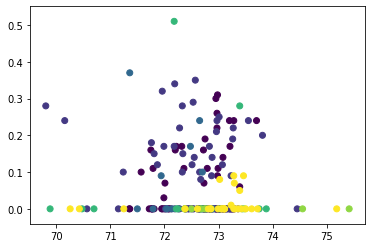

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['Si'] , df['Fe'] , c = df['Class'] , cmap = 'viridis')
plt.show()

In [9]:
X = df.drop(['ID' , 'Class'] , axis = 1)
y = df['Class']
from sklearn.model_selection import train_test_split

In [10]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 4)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(171, 9)
(171,)
(43, 9)
(43,)


# **Decision Tree**

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
from sklearn.metrics import confusion_matrix , accuracy_score

y_pred = model.predict(x_train)
confusion_matrix(y_pred , y_train)

array([[56,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0],
       [ 0,  0, 17,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0, 22]], dtype=int64)

In [13]:
accuracy_score(y_pred , y_train)

1.0

In [14]:
y_test_p = model.predict(x_test)
confusion_matrix(y_test_p , y_test)

array([[10,  1,  0,  0,  2,  0],
       [ 2, 13,  0,  1,  0,  0],
       [ 2,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  7]], dtype=int64)

In [15]:
accuracy_score(y_test_p , y_test)

0.7209302325581395

# **Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [17]:
rfc.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
from sklearn.metrics import confusion_matrix , accuracy_score

y_rfp = rfc.predict(x_train)
confusion_matrix(y_rfp , y_train)

array([[56,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0],
       [ 0,  0, 17,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0, 22]], dtype=int64)

In [19]:
accuracy_score(y_rfp , y_train)

1.0

In [20]:
y_rfpt = rfc.predict(x_test)
confusion_matrix(y_rfpt , y_test)

array([[14,  1,  0,  0,  0],
       [ 0, 15,  0,  0,  0],
       [ 0,  1,  2,  0,  0],
       [ 0,  0,  0,  2,  0],
       [ 0,  0,  1,  0,  7]], dtype=int64)

In [21]:
accuracy_score(y_rfpt , y_test)

0.9302325581395349